In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
folder = 'itachi'
file = 'itachi.csv'

In [0]:
path = Path(base_dir) 
dest =path/folder
#dest.mkdir(parents=True,exist_ok=True)
#path.ls()


In [7]:
download_images(dest/file,dest,max_pics=200,max_workers=0)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'sasuke'
file = 'sasuke.csv'

In [0]:
dest =path/folder


In [10]:
download_images(dest/file,dest,max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
folder = 'naruto'
file = 'naruto.csv'
dest=path/folder

In [12]:
download_images(dest/file,dest,max_pics=200)

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [13]:
classes = ['naruto','sasuke','itachi']
path

PosixPath('/content/gdrive/My Drive/Colab Notebooks')

In [14]:
for c in classes :
    print (c)
    verify_images(path/c,delete=True,max_workers=8)

naruto


sasuke


itachi


In [0]:
np.random.seed(1)
data=ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,ds_tfms=get_transforms(),size=224,num_workers=4).normalize(imagenet_stats)

In [16]:
path
#data


PosixPath('/content/gdrive/My Drive/Colab Notebooks')

In [17]:
data

ImageDataBunch;

Train: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sasuke,sasuke,sasuke,sasuke,sasuke
Path: /content/gdrive/My Drive/Colab Notebooks;

Valid: LabelList (108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sasuke,naruto,naruto,itachi,itachi
Path: /content/gdrive/My Drive/Colab Notebooks;

Test: None

In [18]:
data.classes

['itachi', 'naruto', 'sasuke']

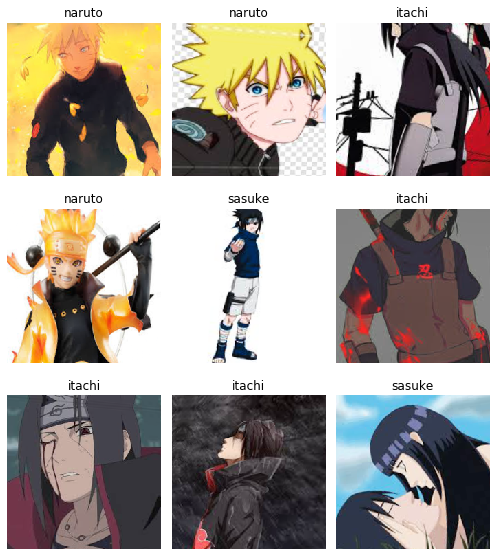

In [19]:
data.show_batch(rows=3,figsize=(7,8))

In [20]:
len(data.train_ds)
len(data.valid_ds)

108

In [0]:
######creating and training tha model

In [22]:
learn= cnn_learner(data,models.resnet50,metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [23]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.348563,1.142368,0.351852,00:07
1,1.023515,1.037738,0.222222,00:05
2,0.788376,0.992107,0.203704,00:05
3,0.642053,0.878232,0.194444,00:05
4,0.559027,0.844973,0.194444,00:05
5,0.496416,0.831265,0.194444,00:05


In [0]:
learn.save('stage1')


In [0]:
learn.unfreeze()

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


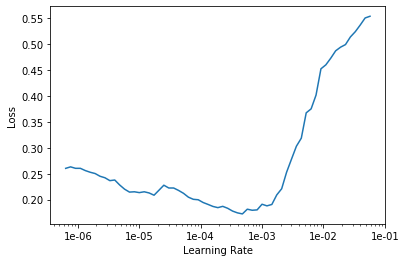

In [27]:
learn.recorder.plot()


In [28]:

learn.fit_one_cycle(4,max_lr=slice(5e-05,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.237984,0.841401,0.222222,00:05
1,0.202573,0.770318,0.194444,00:05
2,0.184740,0.686628,0.203704,00:05
3,0.171213,0.660431,0.185185,00:05


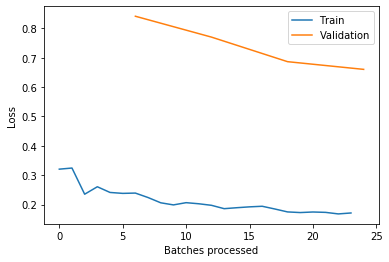

In [29]:
learn.recorder.plot_losses()


In [0]:
learn.save('stage2')


In [31]:
learn.load('stage2')

Learner(data=ImageDataBunch;

Train: LabelList (432 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sasuke,sasuke,sasuke,sasuke,sasuke
Path: /content/gdrive/My Drive/Colab Notebooks;

Valid: LabelList (108 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
sasuke,naruto,naruto,itachi,itachi
Path: /content/gdrive/My Drive/Colab Notebooks;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(

In [32]:
interp=ClassificationInterpretation.from_learner(learn)

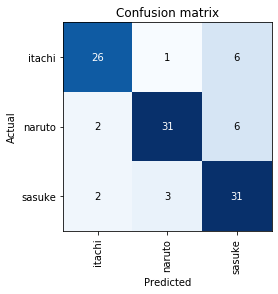

In [33]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

In [0]:
losses,idxs=interp.top_losses()

In [36]:
losses

tensor([1.4174e+01, 7.3143e+00, 5.8569e+00, 5.8487e+00, 5.0512e+00, 4.4007e+00,
        3.6739e+00, 3.5460e+00, 2.6539e+00, 1.9769e+00, 1.7835e+00, 1.5871e+00,
        1.5151e+00, 1.3564e+00, 1.2194e+00, 1.2099e+00, 9.1439e-01, 9.0984e-01,
        8.9148e-01, 8.2237e-01, 6.6092e-01, 5.6496e-01, 4.5496e-01, 3.9608e-01,
        3.0418e-01, 2.9640e-01, 2.9247e-01, 1.9662e-01, 1.8316e-01, 1.5233e-01,
        1.5041e-01, 1.2827e-01, 1.0381e-01, 1.0023e-01, 8.7174e-02, 8.5398e-02,
        8.3365e-02, 6.4494e-02, 6.1710e-02, 5.0725e-02, 3.5001e-02, 2.0749e-02,
        1.7938e-02, 1.7083e-02, 1.0814e-02, 1.0787e-02, 1.0654e-02, 1.0316e-02,
        9.1402e-03, 8.1159e-03, 7.3288e-03, 4.7159e-03, 4.6284e-03, 4.5067e-03,
        4.1800e-03, 3.5613e-03, 2.5977e-03, 2.4168e-03, 2.2549e-03, 2.0613e-03,
        1.8506e-03, 1.7046e-03, 1.5527e-03, 1.5007e-03, 1.3882e-03, 1.0610e-03,
        8.6532e-04, 5.7943e-04, 4.9543e-04, 4.3502e-04, 4.3371e-04, 3.6579e-04,
        2.9953e-04, 2.9440e-04, 1.6771e-

In [37]:
idxs

tensor([ 33,   3,  32,  78,  77,  35,  49,  22,  19, 107,  57,  82,  38,  36,
         62,  81,  60,  94,  86,  21,  28,  71,  15,  83,  64,   4,  79,  63,
         67,  80,  90, 106,  69,  96,  75,  53,  17,  65,  56,  73,  43,  58,
         24,  10, 104,  44,  16,  92,  48,  72,  31,  61,  18, 103,  52,  29,
         12,  37,  70, 105,   7,   6,  42,  13,  54,   9,  99,  85,   8,  11,
         68,  47,  89,  14,   0,  95,  25,  88,  55,  87,  41, 101,  26,  97,
        100,  84,  74,   2,  76,  40, 102,  23,  20,  30,   5,  93,  51,  66,
         50,  34,  59,  91,  39,   1,  98,  46,  45,  27])

In [38]:
top_loss_paths=data.valid_ds.x[idxs]
path2=Path(root_dir)
path2

PosixPath('/content/gdrive/My Drive')

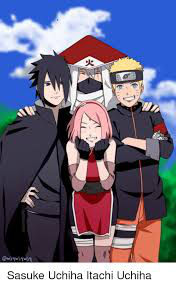

In [39]:
top_loss_paths[4]



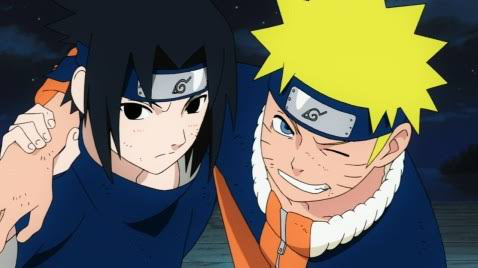

In [40]:

img=open_image(path2/'test'/'6.jpeg')
img

In [0]:
#putting the model in production

In [42]:
classes=['itachi','naruto','sasuke']
data2=ImageDataBunch.single_from_classes(path,classes,ds_tfms=get_transforms(),size=224).normalize(imagenet_stats)
learn=cnn_learner(data2,models.resnet50)
learn.load('stage2')

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/Colab Notebooks;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/My Drive/Colab Notebooks;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (con

In [0]:
data2
??learn.predict

In [0]:
pred_class,pred_idx,ouputs=learn.predict(img)

In [45]:
pred_class,ouputs

(Category naruto, tensor([1.1952e-01, 8.8037e-01, 1.0874e-04]))